In [1]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

def check_metrics(true_val, pred_val):
    print("Accuracy: ", accuracy_score(true_val, pred_val))
    print("Roc_Auc: ", roc_auc_score(true_val, pred_val))
    print("Precision: ", precision_score(true_val, pred_val), " - процент правильно определенных положительных")
    print("Recall: ", recall_score(true_val, pred_val), " - процент выбранных положительных")


In [2]:
import numpy as np
import pandas as pd

In [3]:
data = pd.read_excel("~/Desktop/data.xls",header = 3)

In [4]:
data.head(5)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Глюкоза,Мочевина,Креатинин,Мочевая к-та,Холестерин,Х-ЛПВП,...,"Анг II, пг/мл (N 10-60 пг/мл)","ЭТ, пмоль/л (N =0,09)","VEGF, пг/мл (N40-600)",HLDF (нг/мл,АТ к S100b,АТ к Анг II,АТ к ЭТ,АТ к HLDF- 24,Unnamed: 35,Unnamed: 36
0,NaN,NaN,NaN,NaN,мМ/Л,мМ/Л,мкМ/Л,мкМ/Л,мМ/Л,мМ/Л,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,Сл-сантехник,2.0,1956.0,6.2,5.9,110,443,6.2,1.07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2.0
2,3.0,инженер,1.0,1962.0,5.2,5,72,164,5.5,2.27,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,3.0
3,4.0,Инженер-технолог,-1000.0,1962.0,5.1,5.8,85,345,6.6,2.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,4.0
4,5.0,водитель,2.0,1964.0,5.6,5.7,74,438,6.3,1.04,...,0.38,0.07,458.4,NaN,1600.0,1600.0,400.0,50.0,0,5.0


In [5]:
data = data.drop(0)

In [6]:
data = data.rename(columns={"Unnamed: 0" : "Number", "Unnamed: 1" : "Profession"})
data = data.rename(columns={"Unnamed: 2" : "Gender", "Unnamed: 3" : "Birth_year"})

In [7]:
data.head(5)

,Number,Profession,Gender,Birth_year,Глюкоза,Мочевина,Креатинин,Мочевая к-та,Холестерин,Х-ЛПВП,...,"Анг II, пг/мл (N 10-60 пг/мл)","ЭТ, пмоль/л (N =0,09)","VEGF, пг/мл (N40-600)",HLDF (нг/мл,АТ к S100b,АТ к Анг II,АТ к ЭТ,АТ к HLDF- 24,Unnamed: 35,Unnamed: 36
1,2.0,Сл-сантехник,2.0,1956.0,6.2,5.9,110,443,6.2,1.07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2.0
2,3.0,инженер,1.0,1962.0,5.2,5,72,164,5.5,2.27,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,3.0
3,4.0,Инженер-технолог,-1000.0,1962.0,5.1,5.8,85,345,6.6,2.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,4.0
4,5.0,водитель,2.0,1964.0,5.6,5.7,74,438,6.3,1.04,...,0.38,0.07,458.40,NaN,1600.0,1600.0,400.0,50.0,0,5.0
5,12.0,слесарь,2.0,1959.0,5.7,5.5,88,286,7.1,0.91,...,0.00,0.32,70.91,120.0,400.0,400.0,600.0,100.0,0,12.0


In [8]:
data.columns

Index(['Number', 'Profession', 'Gender', 'Birth_year', 'Глюкоза', 'Мочевина',
       'Креатинин', 'Мочевая к-та', 'Холестерин', 'Х-ЛПВП', 'Х-ЛПНП',
       'Триглицериды', 'индекс массы тела', 'курк\ение',
       'избыт, Потр, Алкоголя', 'и,п повар, Соли', 'гиподинамия', 'стресс',
       'прием п\щ контрац', 'насл отяг, По ГБ, ', 'насл отяг, По ССЗ',
       'насл отяг, По СД', 'насл, Отяг по почечн, Заб', 'САД', 'ДАД',
       'ГЛЖ ин Соколова-Лайона', 'S100b, нг/л (N до 90)',
       'Анг II, пг/мл (N 10-60 пг/мл)', 'ЭТ, пмоль/л    (N =0,09)',
       'VEGF,  пг/мл (N40-600)', 'HLDF (нг/мл', 'АТ к S100b', 'АТ к Анг  II ',
       'АТ к ЭТ ', 'АТ к HLDF- 24', 'Unnamed: 35', 'Unnamed: 36'],
      dtype='object')

In [9]:
data['Profession'].unique().__len__()
# дропнуть штоле?

56

In [10]:
data = data.drop(columns={"Unnamed: 36"})

In [11]:
data = data.rename(columns={"Unnamed: 35" : "Target"})

In [12]:
data["Target"].unique()

array([0, 'о', 'п'], dtype=object)

In [13]:
data["Target"].replace({0 : 'о'}, inplace = True)

In [14]:
data["male"] = (data["Gender"] == 2).astype(int)
data["female"] = (data["Gender"] == 1).astype(int)
data["no_spec_gender"] = (data["Gender"] == -1000).astype(int)
data = data.drop(columns={"Gender"})

In [15]:
data["Profession"].replace({"инженер " : "инженер", "инженр" : "инженер", "мастер " : "мастер"}, inplace=True)
data["Profession"].fillna("no_info", inplace=True)

In [16]:
#laborers - ручная работа
#servants - обсл. состав
#leadership - управление
#scientific - научные специальности, работа мозгом
#engineering - инж. специальности
#no_data - без инфы
#retiree - пенсионер
data['laborers'] = data['Profession'] == 'Сл-сантехник' 
data['laborers'] |=                    data['Profession'] == 'водитель' 
data['laborers'] |=                    data['Profession'] == 'слесарь ' 
data['laborers'] |=                    data['Profession'] == 'изолировщица' 
data['laborers'] |=                    data['Profession'] == 'аппаратчик' 
data['laborers'] |=                    data['Profession'] == 'тракторист' 
data['laborers'] |=                    data['Profession'] == 'плавильщик' 
data['laborers'] |=                    data['Profession'] == 'токарь ' 
data['laborers'] |=                    data['Profession'] == 'оператор                    1962' 
data['laborers'] |=                    data['Profession'] == 'пригот-ль р-ров' 
data['laborers'] |=                    data['Profession'] == 'монтажник РЭА' 
data['laborers'] |=                    data['Profession'] == 'техник' 
data['laborers'] |=                    data['Profession'] == 'сборщик м-схем'  
data['laborers'] |=                    data['Profession'] == 'машинист' 
data['laborers'] |=                    data['Profession'] == 'старший мастер' 
data['laborers'] |=                    data['Profession'] == 'гальваник' 
data['laborers'] |=                    data['Profession'] == 'мастер отд работ1969' 
data['laborers'] |=                    data['Profession'] == 'эл. сварщик' 
data['laborers'] |=                    data['Profession'] == 'фрезеровщик' 
data['laborers'] |=                    data['Profession'] == 'изолировщик ' 
data['laborers'] |=                    data['Profession'] == 'эл,сварщик' 
data['laborers'] |=                    data['Profession'] == 'электромонтажник' 
data['laborers'] |=                    data['Profession'] == 'маляр' 
data['laborers'] |=                    data['Profession'] == 'маляр-штукатур' 
data['laborers'] |=                    data['Profession'] == 'мастер' 
data['laborers'] |=                    data['Profession'] == 'прессовщик'
data['laborers'] |=                    data['Profession'] == 'электрик'

data['servants'] = data['Profession'] == 'горничная' 
data['servants'] |=                    data['Profession'] == 'контролер КПП' 
data['servants'] |=                    data['Profession'] == 'диспетчер' 
data['servants'] |=                    data['Profession'] == 'дежурная' 
data['servants'] |=                    data['Profession'] == 'секретарь '

data['leadership'] = data['Profession'] == 'нач группы ' 
data['leadership'] |=                     data['Profession'] == 'нач сектора' 
data['leadership'] |=                       data['Profession'] == 'гл инженер ' 
data['leadership'] |=                      data['Profession'] == 'нач-к ПРБ' 
data['leadership'] |=                      data['Profession'] == 'нач-к тех,бюро' 
data['leadership'] |=                      data['Profession'] == 'нач-к группы' 
data['leadership'] |=                      data['Profession'] == 'старший мастер' 
data['leadership'] |=                      data['Profession'] == 'нач-к бюро ' 
data['leadership'] |=                      data['Profession'] == 'нач-к сектора' 
data['leadership'] |=                      data['Profession'] == 'мастер'
data['leadership'] |=                     data['Profession'] == 'зам, нач-ка отд,'

data['scientific'] = data['Profession'] == 'внс' 
data['scientific'] |=                      data['Profession'] == 'вед,специалист'
data['scientific'] |=                      data['Profession'] == 'науч. сотр'
data['scientific'] |=                      data['Profession'] == 'нач-к тех,бюро'
data['scientific'] |=                      data['Profession'] == 'нач-к бюро '
data['scientific'] |=                      data['Profession'] == 'экономист '

data['engineering'] = data['Profession'] == 'инженер'
data['engineering'] |= data['Profession'] == 'Инженер-технолог' 
data['engineering'] |= data['Profession'] == 'гл инженер '
data['engineering'] |= data['Profession'] == 'наладчик' 
data['engineering'] |= data['Profession'] == 'измеритель' 
data['engineering'] |= data['Profession'] == 'инженер-прогр,'
data['engineering'] |= data['Profession'] == 'нач-к тех,бюро'

data['no_job_data'] = data['Profession'] == 'no_info'
data['no_job_data'] |= data['Profession'] == 'УВОЛЕНА'
data['no_job_data'] |= data['Profession'] == 'УВОЛЕН'

data['retiree'] = data['Profession'] == 'ПЕНСИОНЕР'

In [17]:
data['laborers'] = data['laborers'].astype(int)
data['servants'] = data['servants'].astype(int)
data['leadership'] = data['leadership'].astype(int)
data['scientific'] = data['scientific'].astype(int)
data['engineering'] = data['engineering'].astype(int)
data['no_job_data'] = data['no_job_data'].astype(int)
data['retiree'] = data['retiree'].astype(int)

In [18]:
data = data.drop(columns={'Profession'})

In [19]:
data["age"] = 2019 - data["Birth_year"]
data = data.drop(columns = {'Birth_year'})
data.head(1)

,Number,Глюкоза,Мочевина,Креатинин,Мочевая к-та,Холестерин,Х-ЛПВП,Х-ЛПНП,Триглицериды,индекс массы тела,...,female,no_spec_gender,laborers,servants,leadership,scientific,engineering,no_job_data,retiree,age
1,2.0,6.2,5.9,110,443,6.2,1.07,4.25,2.37,20,...,0,0,1,0,0,0,0,0,0,63.0


In [20]:
data['ГЛЖ ин Соколова-Лайона'].replace({"нет" : np.NaN, "да" : np.NaN}, inplace = True)

In [21]:
data.replace({"нет" : 0, "да" : 1, "нет " : 0, "да " : 1, "не" : 0}, inplace = True)

In [22]:
data.rename(columns={'курк\ение' : 'smoking', 'избыт, Потр, Алкоголя' : 'Alcoholic'}, inplace=True)

In [23]:
data['smoking'].replace({'нет нет' : 0}, inplace = True)
data['smoking'].unique(), data['smoking'].dtype

(array([1, 0]), dtype('int64'))

In [24]:
data['Alcoholic'].replace({'нет нет нет нет нет ' : 0, "нет  нет нет" : 0}, inplace = True)
data['Alcoholic'].unique(), data['Alcoholic'].dtype

(array([0, 1]), dtype('int64'))

In [25]:
data.rename(columns={'и,п повар, Соли' : 'excess_salt_consumption'}, inplace = True)
data['excess_salt_consumption'].unique()

array([0, 1])

In [26]:
data['гиподинамия'].replace({'нетт' : 0}, inplace = True)
data["гиподинамия"].unique(), data['гиподинамия'].dtype

(array([0, 1]), dtype('int64'))

In [27]:
data.replace({'уволил' : 6.0}, inplace = True)

In [28]:
data['индекс массы тела'].unique()

array([20, 20.69, 30.47, 31.8, 26.5, 40.2, 23.9, 41.03, 32.5, 21.5, 30.07,
       24.15, 29.32, 26.64, 25.47, 31.05, 21.01, 18.44, 19.89, 22.86,
       31.56, 25.5, 27.89, 29.4, 17.65, 29.05, 23.08, 45.3, 38.37, 23.12,
       25.46, 29.04, 24.68, 28.93, 27.14, 23.67, 29.31, 29.17, 27.44,
       26.22, 23.31, 27.66, 25.28, 23.44, '21, 08', 21.88, '26, 47', 24.8,
       18.78, 34.05, 20.28, 32, 48.33, 32.27, 21.64, 28.4, 27.87, 24.1,
       29.58, 33.08, 43.7, 28.08, 26.47, 22.84, 25.53, 23.14, 23.23, 22.3,
       40.16, 35.8, 26.85, 33.02, 23.05, 28.03, 28.41, 27.04, 38.74,
       28.34, 29.68, 24.6, 29.76, 27.68, 27.97, 27.12, 33.21, 39.92,
       25.16, 33.39, 31.23, '25, 04', 34.21, 49.08, 23.66, 24.16, 23.42,
       32.18, 25.84, 32.6, 26.9, 24.22, 22.34, 24.45, 27.24, 31.14, 22.03,
       36.06, 22.92, 24.54, 23.72, 29.07, 33.75, 19.14, 30.86, 27.09,
       25.03], dtype=object)

In [29]:
help_array = np.empty(len(data))

In [30]:
for enum, item in enumerate(data['индекс массы тела']):
    if type(item) == str:
        sub_str = item[0:2] + "." + item[4:]
        sub_float = float(sub_str)
        print(sub_float, type(sub_float))
        help_array[enum] = sub_float
        
    else:
        help_array[enum] = item

21.08 <class 'float'>
26.47 <class 'float'>
25.04 <class 'float'>


In [31]:
data['индекс массы тела'] = help_array

In [32]:
data['индекс массы тела'].unique()

array([20.  , 20.69, 30.47, 31.8 , 26.5 , 40.2 , 23.9 , 41.03, 32.5 ,
       21.5 , 30.07, 24.15, 29.32, 26.64, 25.47, 31.05, 21.01, 18.44,
       19.89, 22.86, 31.56, 25.5 , 27.89, 29.4 , 17.65, 29.05, 23.08,
       45.3 , 38.37, 23.12, 25.46, 29.04, 24.68, 28.93, 27.14, 23.67,
       29.31, 29.17, 27.44, 26.22, 23.31, 27.66, 25.28, 23.44, 21.08,
       21.88, 26.47, 24.8 , 18.78, 34.05, 20.28, 32.  , 48.33, 32.27,
       21.64, 28.4 , 27.87, 24.1 , 29.58, 33.08, 43.7 , 28.08, 22.84,
       25.53, 23.14, 23.23, 22.3 , 40.16, 35.8 , 26.85, 33.02, 23.05,
       28.03, 28.41, 27.04, 38.74, 28.34, 29.68, 24.6 , 29.76, 27.68,
       27.97, 27.12, 33.21, 39.92, 25.16, 33.39, 31.23, 25.04, 34.21,
       49.08, 23.66, 24.16, 23.42, 32.18, 25.84, 32.6 , 26.9 , 24.22,
       22.34, 24.45, 27.24, 31.14, 22.03, 36.06, 22.92, 24.54, 23.72,
       29.07, 33.75, 19.14, 30.86, 27.09, 25.03])

In [33]:
data.dtypes

Number                           float64
Глюкоза                          float64
Мочевина                         float64
Креатинин                          int64
Мочевая к-та                       int64
Холестерин                       float64
Х-ЛПВП                           float64
Х-ЛПНП                           float64
Триглицериды                     float64
индекс массы тела                float64
smoking                            int64
Alcoholic                          int64
excess_salt_consumption            int64
гиподинамия                        int64
стресс                             int64
прием п\щ контрац                  int64
насл отяг, По ГБ,                  int64
насл отяг, По ССЗ                  int64
насл отяг, По СД                   int64
насл, Отяг по почечн, Заб          int64
САД                              float64
ДАД                              float64
ГЛЖ ин Соколова-Лайона           float64
S100b, нг/л (N до 90)             object
Анг II, пг/мл (N

In [34]:
data['S100b, нг/л (N до 90)'].replace({'ИНФАРКТ МОЗГА В 2018 ГОДУ' : -1}, inplace = True)

In [36]:
data['Анг II, пг/мл (N 10-60 пг/мл)']

1       NaN
2       NaN
3       NaN
4      0.38
5      0.00
       ... 
113    0.80
114     NaN
115     NaN
116     NaN
117     NaN
Name: Анг II, пг/мл (N 10-60 пг/мл), Length: 117, dtype: float64

In [37]:
from sklearn.model_selection import train_test_split

In [424]:
train_data, test_data, train_target, test_target = train_test_split(data.drop(columns = {"Target"}), np.array(data["Target"]),
                                                                    test_size = 0.3, random_state = 17)

In [425]:
test_target[np.where(test_target == 'п')] = 1

In [426]:
test_target[np.where(test_target == 'о')] = -1

In [427]:
train_target[np.where(train_target == 'п')] = 1

In [429]:
train_target[np.where(train_target == 'о')] = -1

In [430]:
test_target = test_target.astype(int)
train_target = train_target.astype(int)

In [399]:
train_data = train_data.fillna(0)
test_data = test_data.fillna(0)

In [400]:
train_data = (train_data - train_data.mean()) / train_data.std()

In [401]:
test_data = (test_data - test_data.mean()) / test_data.std()

In [606]:
results = []
methods = []

In [295]:
from sklearn.tree import DecisionTreeClassifier

In [320]:
DTC = DecisionTreeClassifier(criterion='entropy')

In [321]:
DTC.fit(train_data.fillna(0), train_target)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [607]:
results.append(DTC.predict(test_data.fillna(0)))
methods.append("DTC")

In [323]:
from sklearn.ensemble import RandomForestClassifier

In [324]:
RFC = RandomForestClassifier(n_estimators = 400)

In [325]:
RFC.fit(train_data.fillna(0), train_target)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [608]:
results.append(RFC.predict(test_data.fillna(0)))
methods.append("RFC")

In [327]:
from sklearn.ensemble import AdaBoostClassifier

In [328]:
ABC = AdaBoostClassifier()

In [329]:
ABC.fit(train_data.fillna(0), train_target)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

In [609]:
results.append(ABC.predict(test_data.fillna(0)))
methods.append("ABC")

In [331]:
from sklearn.svm import SVC

In [615]:
SVM = SVC(probability = True, kernel = 'linear')

In [333]:
SVM.fit(train_data.fillna(0), train_target)

/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=True, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [334]:
check_metrics(test_target, SVM.predict(test_data.fillna(0)))

Accuracy:  0.5555555555555556
Roc_Auc:  0.5
Precision:  0.0  - процент правильно определенных положительных
Recall:  0.0  - процент выбранных положительных


/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [616]:
ABC = AdaBoostClassifier(base_estimator=SVM)

In [617]:
ABC.fit(train_data.fillna(0), train_target)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=SVC(C=1.0, cache_size=200, class_weight=None,
                                      coef0=0.0, decision_function_shape='ovr',
                                      degree=3, gamma='auto_deprecated',
                                      kernel='linear', max_iter=-1,
                                      probability=True, random_state=None,
                                      shrinking=True, tol=0.001,
                                      verbose=False),
                   learning_rate=1.0, n_estimators=50, random_state=None)

In [619]:
results.append(ABC.predict(test_data.fillna(0)))
methods.append("ABC + SVC")

In [339]:
features = DTC.feature_importances_

In [347]:
train_data.columns[features != 0], train_data.columns[np.argmax(features)]

(Index(['Number', 'Мочевая к-та', 'стресс', 'САД', 'HLDF (нг/мл'], dtype='object'),
 'HLDF (нг/мл')

In [281]:
features[features != 0]

array([0.16000699, 0.04423711, 0.04881101, 0.08110138, 0.22609788,
       0.02534418, 0.39417142, 0.02023003])

In [580]:
train_data, test_data, train_target, test_target = train_test_split(data.drop(columns = {"Target"}), np.array(data["Target"]),
                                                                    test_size = 0.3, random_state = 17)

In [581]:
test_target[np.where(test_target == 'п')] = 1

In [582]:
test_target[np.where(test_target == 'о')] = -1

In [583]:
train_target[np.where(train_target == 'п')] = 1

In [584]:
train_target[np.where(train_target == 'о')] = -1

In [585]:
test_target = test_target.astype(int)
train_target = train_target.astype(int)

In [586]:
from sklearn.ensemble import BaggingClassifier

In [602]:
BC = BaggingClassifier(random_state = 443, oob_score=True)

In [603]:
BC.fit(train_data.fillna(0), train_target)

BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=1.0, max_samples=1.0, n_estimators=10,
                  n_jobs=None, oob_score=True, random_state=443, verbose=0,
                  warm_start=False)

In [642]:
check_metrics(test_target, BC.predict(test_data.fillna(0)))


Accuracy:  0.9166666666666666
Roc_Auc:  0.9125
Precision:  0.9333333333333333  - процент правильно определенных положительных
Recall:  0.875  - процент выбранных положительных


In [635]:
methods[3]

'BC'

In [636]:
accuracy = [accuracy_score(test_target, result) for result in results]
roc_auc = [roc_auc_score(test_target, result) for result in results]
precision = [precision_score(test_target, result) for result in results]
recall = [recall_score(test_target, result) for result in results]

In [637]:
import matplotlib.pyplot as plt

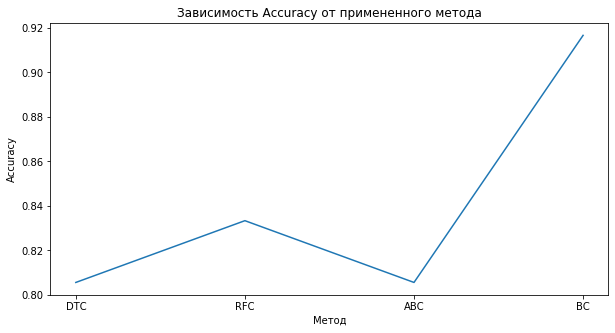

In [638]:
fig = plt.figure(figsize=[10, 5])

plt.plot(methods, accuracy)
plt.title("Зависимость Accuracy от примененного метода")
plt.xlabel("Метод")
plt.ylabel("Accuracy")

plt.show()

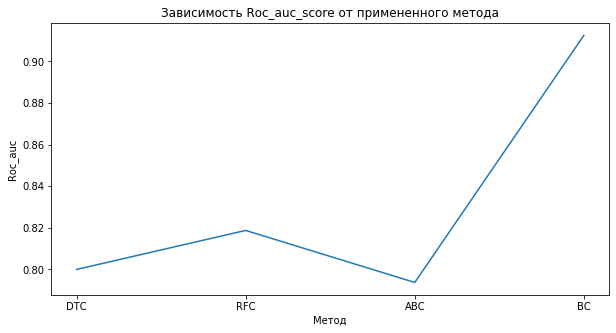

In [639]:
fig = plt.figure(figsize=[10, 5])

plt.plot(methods, roc_auc)
plt.title("Зависимость Roc_auc_score от примененного метода")
plt.xlabel("Метод")
plt.ylabel("Roc_auc")

plt.show()

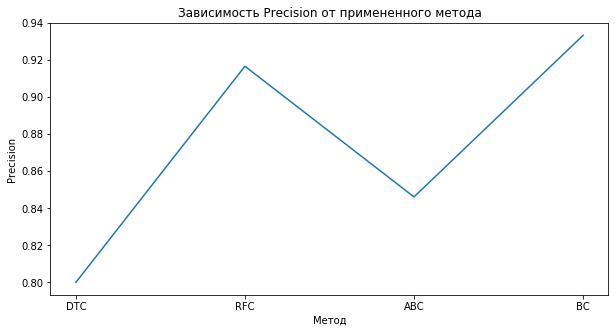

In [640]:
fig = plt.figure(figsize=[10, 5])

plt.plot(methods, precision)
plt.title("Зависимость Precision от примененного метода")
plt.xlabel("Метод")
plt.ylabel("Precision")

plt.show()

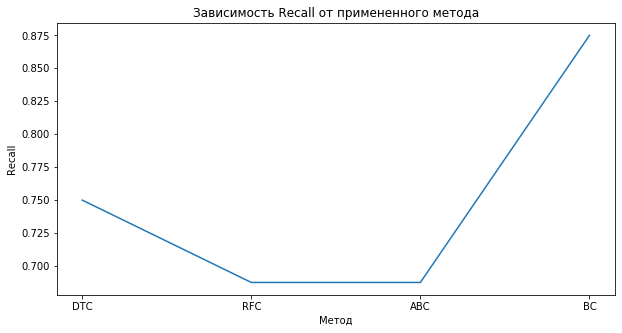

In [641]:
fig = plt.figure(figsize=[10, 5])

plt.plot(methods, recall)
plt.title("Зависимость Recall от примененного метода")
plt.xlabel("Метод")
plt.ylabel("Recall")

plt.show()

In [ ]:
import 